# Aykiri Gozlem Analizi 

## Aykiri Degerleri Yakalamak

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# Grafik Ayarlari
# Arka tarf cizgili olur
sns.set_theme(style="whitegrid")


In [114]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [115]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

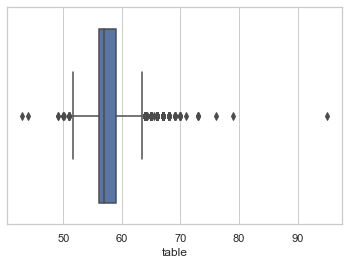

In [116]:
sns.boxplot(x=df_table);

In [117]:
# Boxplot grafigi ile ayni aykiri degerleri bulmak

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

# inter quartile range (IQR)
IQR = Q3 - Q1

print('---------------- 1 ----------------')
print('Q1 =', Q1,'\nQ3 =', Q3,'\nIQR =', IQR, '\n')

print('---------------- 2 ----------------')
print(df_table.describe()[[4,6]], '\n')

print('---------------- 3 ----------------')
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print('Alt sinir=', alt_sinir,'\nUst sinir=', ust_sinir, '\n')

print('---------------- 4 ----------------')
# Aykiri True - False vektoru

aykiri_tf = (df_table < alt_sinir)| (df_table > ust_sinir)

print(df_table[aykiri_tf], '\n')

print('---------------- 5 ----------------')
print(df_table[aykiri_tf].index)

---------------- 1 ----------------
Q1 = 56.0 
Q3 = 59.0 
IQR = 3.0 

---------------- 2 ----------------
25%    56.0
75%    59.0
Name: table, dtype: float64 

---------------- 3 ----------------
Alt sinir= 51.5 
Ust sinir= 63.5 

---------------- 4 ----------------
2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64 

---------------- 5 ----------------
Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)


## Aykiri Deger Problemini Cozmek

## <font color=red>1- Silme Yontemi</font>

In [118]:
# pandas.core.series.Series olani DataFrame e cevirmemiz lazim
type(df_table)

print('---------------- 1 ----------------')
df_table = pd.DataFrame(df_table)
print(type(df_table))

print('---------------- 2 ----------------')
print(df_table.shape, '\n')

# Temiz DataFrame (Aykiri gozlemleri sildik)
#(~ kosulun disindakileri getir demek) (any axis = 1 sutun bazinda herhangi islem yapmak)

print('---------------- 3 ----------------')
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis =1)]
print(t_df)

# 605 gozlem silindi (53940 - 53335 = 605)

print('---------------- 4 ----------------')
print(t_df.shape)

---------------- 1 ----------------
<class 'pandas.core.frame.DataFrame'>
---------------- 2 ----------------
(53940, 1) 

---------------- 3 ----------------
       table
0       55.0
1       61.0
3       58.0
4       58.0
5       57.0
...      ...
53935   57.0
53936   55.0
53937   60.0
53938   58.0
53939   55.0

[53335 rows x 1 columns]
---------------- 4 ----------------
(53335, 1)


 ## <font color=red>2 - Ortalama ile Doldurmak</font>

In [119]:
print('---------------- 0 ----------------')
df_table = df['table']
print(df_table.head())

print('---------------- 1 ----------------')
aykiri_alt_tf = (df_table < alt_sinir)
print(df_table[aykiri_alt_tf].head())

print('---------------- 2 ----------------')
# Aykiri Gozlemler yerine ortalama atandi
df_table[aykiri_alt_tf] = df_table.mean()

print(df_table[aykiri_alt_tf].head())


---------------- 0 ----------------
0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64
---------------- 1 ----------------
2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64
---------------- 2 ----------------
1515    57.457184
3238    57.457184
3979    57.457184
4150    57.457184
5979    57.457184
Name: table, dtype: float64


 ## <font color=red>3 - Baskilma Yontemi</font>

#### (Alt tarafta ise alt deger atanir, ust sinirda ise ust deger atanir)

In [202]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

df_table = df['table']
print(df_table.head())

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64


In [185]:
print('---------------- 0 ----------------')
df_table = df['table']
print(df_table.head())

print('---------------- 1 ----------------')
print(alt_sinir)

print('---------------- 2 ----------------')
aykiri_tf = (df_table < alt_sinir)
print(df_table[aykiri_tf].head())

print('---------------- 3.1 ----------------')
# Alt sinirdaki aykiri degerlere alt sinir degeri atanir
df_table[aykiri_tf] = alt_sinir
print(df_table[aykiri_tf].head())

print('---------------- 3.2 ----------------')
# !!!!!! Kolay Yol !!!!!
# aykirilar = aykiri degerler DataFrame i
# alt_s = alt sinir
# ust_s = ust sinir
# aykirilar.transform(lambda x : (alt_s) if (x< alt_s) else ust_s)

aykirilar = (df_table < alt_sinir) | (df_table > ust_sinir)
print(df_table[aykirilar].transform(lambda x : alt_sinir if (x< alt_sinir) else ust_sinir).head())

---------------- 0 ----------------
0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64
---------------- 1 ----------------
51.5
---------------- 2 ----------------
1515    51.0
3238    50.1
3979    51.0
4150    51.0
5979    49.0
Name: table, dtype: float64
---------------- 3.1 ----------------
1515    51.5
3238    51.5
3979    51.5
4150    51.5
5979    51.5
Name: table, dtype: float64
---------------- 3.2 ----------------
2      63.5
91     63.5
145    63.5
219    63.5
227    63.5
Name: table, dtype: float64


# Cok Degikenli Aykiri Gozlem Analizi

#### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [216]:
print('---------------- 0 ----------------')
# Orjinal DataFrame uzerinde calisacagiz bu sefer 
print(df.head())

print('---------------- 1 ----------------')
# Yeni Kutuphane import ettik
from sklearn.neighbors import LocalOutlierFactor

# n_neighbors = komsu sayisi
# contamination = yogunluk ifade 
# 20 ve 0.1 degeri Veri sayisi ve is bilgisine dayali olarak belirlendi varsadik

clf = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1)
print(clf)

print('---------------- 2 ----------------')
# Algoritmayi calistirma islemi 
clf.fit_predict(df)
print(clf.fit_predict(df))

print('---------------- 3 ----------------')
# Her bir gozlem birimi icin olusturulmus scorelar var
df_score = clf.negative_outlier_factor_
print(df_score)

print('---------------- 4 ----------------')
# Degerler arasindaki farklari inceliyoruz
print(np.sort(df_score)[0:10])

print('---------------- 5 ----------------')
# 13. Degeri esik degeri olsun dedik
esik_deger = np.sort(df_score)[13]
print(esik_deger)
# Esik Degerin Kendisi
print(df[df_score == esik_deger])

print('---------------- 6 ----------------')
aykiri_olmayan_tf = df_score > esik_deger
print(aykiri_olmayan_tf)

print('---------------- 7 ----------------')
# Aykiri Olmayan degerler ulasmak
print(df[aykiri_olmayan_tf].head())

print('---------------- 8 ----------------')
# Aykiri Olan degerler ulasmak 

#(Onemli NOT : Bir oncekinde aykiri deger sayisi 605 idi (boxplot yonteminde) ,
# burda daha az gozlem var ve aykiri degerler Table icin 51.5< <63.5 idi, yani
# Burdaki Table degerleri (son ucu haric) normal sinir icinde aslinda boxplot a gore.

aykiri_tf = df_score < esik_deger

df[aykiri_tf].head()

---------------- 0 ----------------
   carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75
---------------- 1 ----------------
LocalOutlierFactor(contamination=0.1)
---------------- 2 ----------------
[-1 -1 -1 ...  1  1  1]
---------------- 3 ----------------
[-1.58352526 -1.59732899 -1.62278873 ... -1.06721815 -1.00809552
 -1.00849038]
---------------- 4 ----------------
[-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092 -4.81502092
 -4.61522833 -4.37081214 -4.29842288 -4.10492387]
---------------- 5 ----------------
-3.823787967755565
       carat  depth  table  price     x    y     z
31230   0.45   68.6   57.0    756  4.73  4.5  3.19
---------------- 6 ----------------
[ True  True  True ...  True  True  True]
---------------- 7 --------------

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37


## Baskilama (df_score icin baskilama)

In [238]:
'''Amac : Herbir aykiri deger icin esik degeri atatanacak

1 - Index problemi cikacak

2 - Aykiri olmayanlari arraya cevirecez

3 - Baski degerini arraya cevirecez

4 - Sonra aykirilar yerine baski degeri atanacak'''

print('---------------- 0 ----------------')
baski_degeri = df[df_score == esik_deger]
print(baski_degeri)

print('---------------- 1 ----------------')
# 1- Yeniden isimlendirdik DataFrame i
aykirilar = df[aykiri_tf]
print(aykirilar.head(), '\n')

print('---------------- 2 ----------------')
# 2 - Aykirilar numpy array oldu
aykirilar.to_records(index = False)
print(aykirilar.to_records(index = False)[0:3])

print('---------------- 3 ----------------')
# 3 - bu array res olarak adlandirildi
res = aykirilar.to_records(index = False)

print('---------------- 4 ----------------')
# 4 - res icindeki tum degerler baski_degeri ne esitlendi
res[:] = baski_degeri.to_records(index= False)
print(res[0:3])

print('---------------- 4.0 ----------------')
# Dikkat , ama ana df yapisi icinde hala aykiri degerler ayni
print(df[aykiri_tf].head())

print('---------------- 5 ----------------')
# 5 - Ana df aykiri degerler yerine res degerleri atandi , 
# Atama isleminde index olarak df indexi secildi , sabit kaldi 

df[aykiri_tf] = pd.DataFrame(res, index = df[aykiri_tf].index)
print(df[aykiri_tf].head(2))


print('---------------- 5 ----------------')
# Aykiri olmayan degerler
df[~aykiri_tf].head()

---------------- 0 ----------------
       carat  depth  table  price     x    y     z
31230   0.45   68.6   57.0    756  4.73  4.5  3.19
---------------- 1 ----------------
       carat  depth  table  price     x    y     z
6341    0.45   68.6   57.0    756  4.73  4.5  3.19
10377   0.45   68.6   57.0    756  4.73  4.5  3.19
24067   0.45   68.6   57.0    756  4.73  4.5  3.19
35633   0.45   68.6   57.0    756  4.73  4.5  3.19
36503   0.45   68.6   57.0    756  4.73  4.5  3.19 

---------------- 2 ----------------
[(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)]
---------------- 3 ----------------
---------------- 4 ----------------
[(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)]
---------------- 4.0 ----------------
       carat  depth  table  price     x    y     z
6341    0.45   68.6   57.0    756  4.73  4.5  3.19
10377   0.45   68.6   

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


## Baskilama (df_score icin baskilama) 2. Yol

Baskilama kolay yolu

1- Yeniden isimlendirdik DataFrame i

aykirilar = df[aykiri_tf]

2- Aykirilar yerine baski degeri atanir

aykirilar[0:] = baski_degeri

3 - Ana df deki degerler yerine aykirilar atanir

df[aykiri_tf] = aykirilar

# Eksik Veri Analizi

In [256]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(  {"V1" : V1,
                     "V2" : V2,
                     "V3" : V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
'------- 1 - Eksik Degerlerin Saptanmasi ------'
#1 Bos Gozlem Sayisi Kolon basina
df.isnull().sum()

#2 Bos olmayan Sayisi (Dolu) kolon basina
df.notnull().sum()

#3 Toplam Bos Gozlem Sayisi
df.isnull().sum().sum()

#4 True - False Sorgusu (Boolean)
df.isnull()

#5 Bos Satirlari Getirmek
df[df.isnull().any(axis= 1)]

#6 Bos Olmayan Satirlari getirmek (Dolu Satirlari)
df[df.notnull().all(axis= 1)]

#6.2 Dolu Satirlari elle getirmek
df[df['V1'].notnull() & df['V2'].notnull() & df['V3'].notnull()]

'------- 2 - Eksik Degerlerin Silinmesi --------- dropna()'

#1 bir tane bile eksiklik varsa siler
# df.dropna(axis=0, how='any', inplace= False) Default degerleri 
df.dropna(axis=0, how='any', inplace= False)

#2 Butun Degerler bos ise Siler
df.dropna(how= 'all')

#3 Kolonda bir tane bile bos varsa o kolonu siler
df.dropna(axis= 1)

#3 Kolondaki butun degerler bos ise o kolonu siler 
df.dropna(axis=1, how= 'all')

'------- 3 - Eksik Degerlerin Doldurulmasi --------- fillna()'

#1 Bir kolonda degerlerin kendi ortalamasi ile doldurulmasi
df['V1'] = df['V1'].fillna(df['V1'].mean())

#2 SIFIR ile doldurmak
df.V2.fillna(0)
df.V2.fillna(0, inplace= False)

#3.1 Apply ile Butun Bos degerlere kendi kolon ortalamasi ile doldurmak

# x  = kolon ifade eder 
# apply = herbir kolon (sutun) uzerinde islem yapilacak demek
# axis = 0 ise kolon ortalamasini ekler 
# axis = 1 ise satirin ortalamasini ekler !!!!!!!!!

df.apply(lambda x : x.fillna(x.mean()), axis = 0)

#3.2 2. YOL
df.fillna(df.mean())

#3.3 3. YOL
df.where(pd.notna(df), df.mean(), axis= 'columns')

#4 istenilen  kolonlara ortalama atama
df.fillna(df.mean()['V1':'V2'])    # ==> V2 de dahil

#5 median atamak
df['V3'].fillna(df['V3'].median())



'------- 4 - Eksik Veri Yapisinin Gorsellestirme ------'

# Kutuphaneler
!pip install missingno
import missingno as msno

#1 Bar Grafigi ile Eksik Verileri Gorme
msno.bar(df);

#2 Matrix Grafigi ile Eksik veri gorme
msno.matrix(df);

# Sol taraf gozlem sayisi 
# Sag taraf dolu gozlem sayisi
# Beyaz olanlalar bos gozlemler, 6. index hepsi bos , heryer beyaz

#3 Heat Map
msno.heatmap(df);

# Degerler -1 ile 1 arasinda cikacaktir
# Mass ile distance arasinda 0.5 pozitif orta siddete nulltiy correlation (nulltiy korelasyonu) vardir.
# Mass ile orbital_period arasinda 0.2 poztif dusuk siddet nulltiy corr. vardir.

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009 



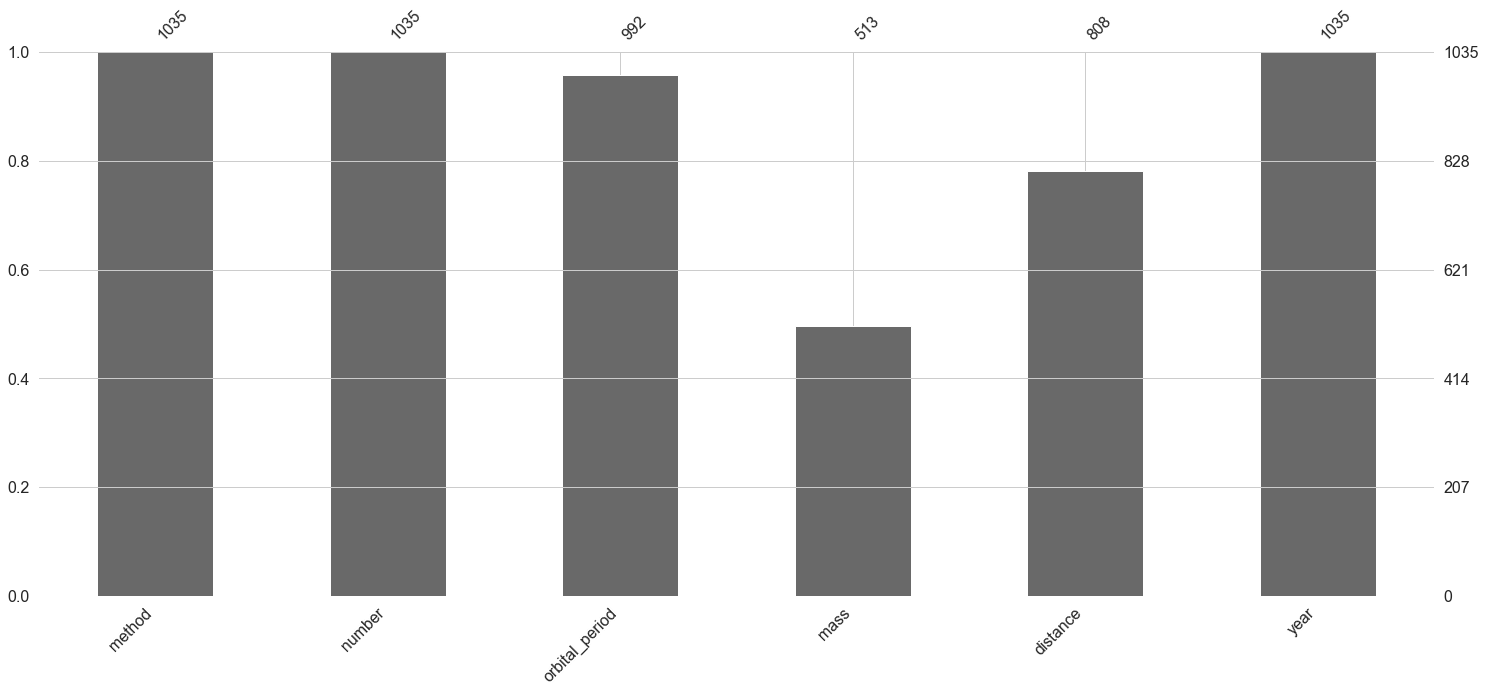

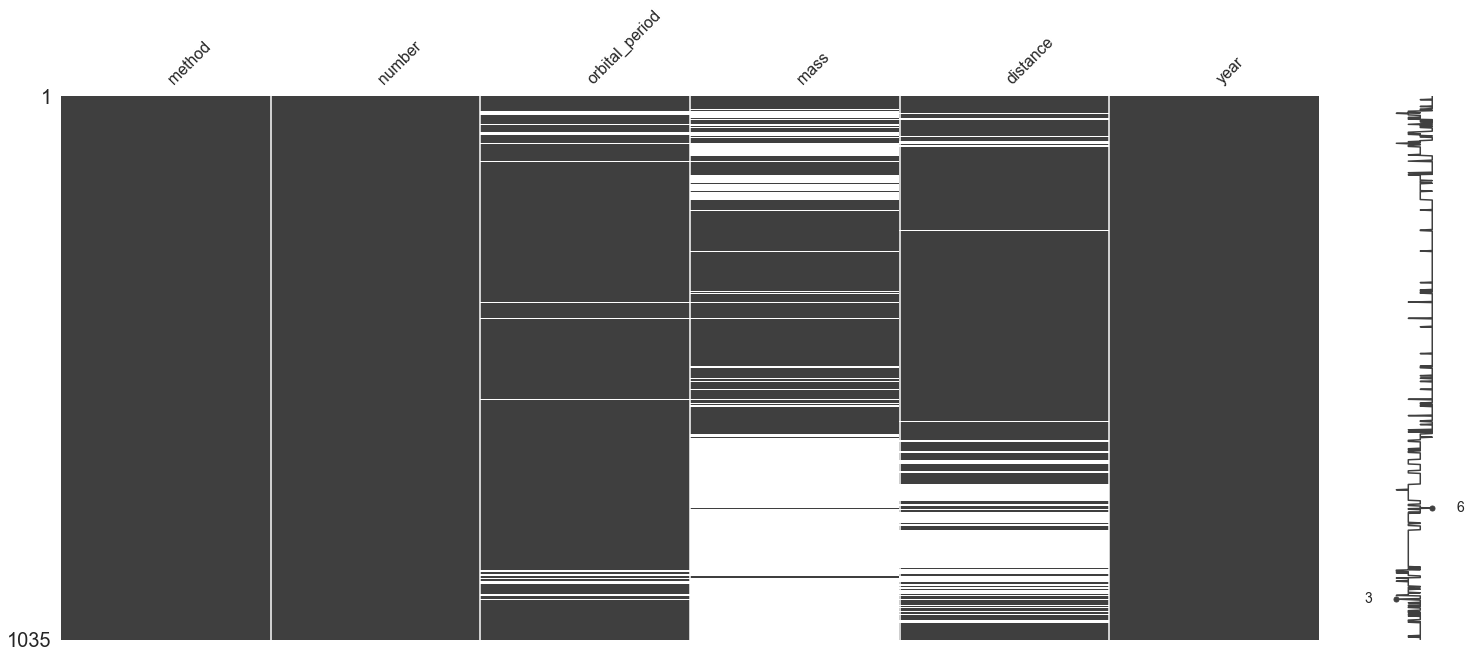

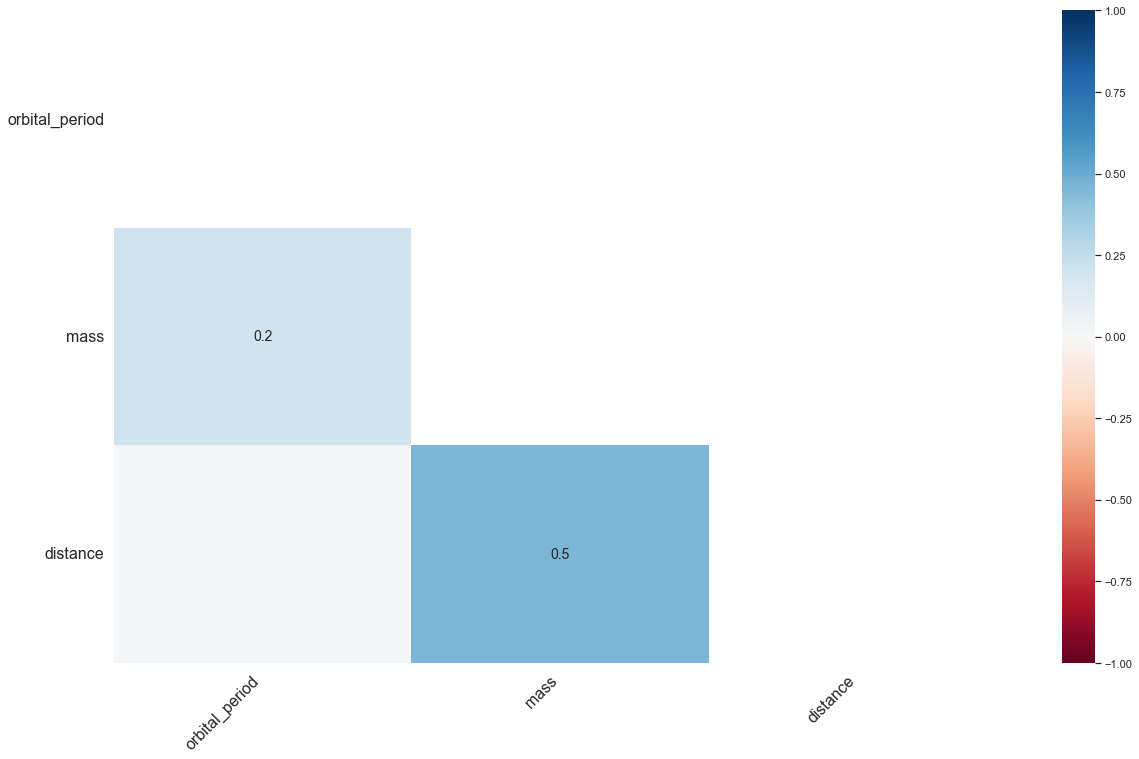

In [255]:
# ------- 4 - Eksik Veri Yapisinin Gorsellestirme ------
import missingno as msno

df = sns.load_dataset('planets')
print(df.head(), '\n')

msno.bar(df);

msno.matrix(df);

msno.heatmap(df);

# Kategorik Degisken Kiriliminda Deger Atama

In [257]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [263]:
print('---------------- 0 ----------------')
# Departmanlara gore maas ortalamsi
df.groupby('departman')['maas'].mean()
print(df.groupby('departman')['maas'].mean())

print('---------------- 1 ----------------')
# Bos maaslarin departman ortalamasina gore doldurulmasi
# transform : bir fonksiyon calismasi icin kullanilir

df['maas'].fillna(df.groupby('departman')['maas'].transform('mean'))
print(df['maas'].fillna(df.groupby('departman')['maas'].transform('mean')))


---------------- 0 ----------------
departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64
---------------- 1 ----------------
0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64


# Katagorik Degiskenler icin Eksik Deger Atama

In [264]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [274]:
print('---------------- 0 ----------------')
df['departman'].mode()
print(df['departman'].mode())

print('---------------- 1 Sutundaki en SIK gecen deger atamak---')
# 
df['departman'].fillna(df['departman'].mode()[0])
print(df['departman'].fillna(df['departman'].mode()[0]).head(3))


print('---------------- 2 Bos degiskeni bir sonraki deger ile doldurmak ---')
# bfill : sonraki deger atanir
df['departman'].fillna(method='bfill')
print(df['departman'].fillna(method='bfill').head(3))

print('---------------- 3 Bos degiskeni bir onceki deger ile doldurmak ---')
# ffill : onceki deger atanir
df.departman.fillna(method='ffill').head(3)



---------------- 0 ----------------
0    IK
dtype: object
---------------- 1 Sutundaki en SIK gecen deger atamak---
0    IT
1    IK
2    IK
Name: departman, dtype: object
---------------- 2 Bos degiskeni bir sonraki deger ile doldurmak ---
0    IT
1    IK
2    IK
Name: departman, dtype: object
---------------- 3 Bos degiskeni bir onceki deger ile doldurmak ---


0    IT
1    IT
2    IK
Name: departman, dtype: object

# Tahmine Dayali Deger Atama Yontemleri

In [289]:
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [296]:
# 1 - KNN YONTEMI

print('---------------- 0 Kutuphaneler ----')
#!pip install ycimpute
from ycimpute.imputer import knnimput

print('---------------- 1 Kolon isimleri liste haline getirildi ----')
# Sadece numeric degerler var DataFrame de !!!!!
var_names = list(df)
print(var_names)

print('---------------- 2 DataFrame numpy serisi haline getirildi ----')
n_df = np.array(df)
print(n_df[0:2])
print('Shape : ',n_df.shape)
print('\n')

print('---------------- 3 KNN ile Tamamlama Yapilidi----')
# KNN yontemi ile k = 4 secilerek bosluklara atama yapildi
dff = knnimput.KNN(k = 4).complete(n_df)
print('\n')

print('---------------- 4 dff numpy serisi DataFrame cevrildi ----')
dff = pd.DataFrame(dff, columns= var_names)
print(dff.head())
print('\n')

print('---------------- 5 Bos Eleman Kalmadi----')
dff.isnull().sum()


---------------- 0 Kutuphaneler ----
---------------- 1 Kolon isimleri liste haline getirildi ----
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
---------------- 2 DataFrame numpy serisi haline getirildi ----
[[ 0.      3.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]]
Shape :  (891, 6)


---------------- 3 KNN ile Tamamlama Yapilidi----
Imputing row 1/891 with 0 missing, elapsed time: 0.193
Imputing row 101/891 with 0 missing, elapsed time: 0.194
Imputing row 201/891 with 0 missing, elapsed time: 0.196
Imputing row 301/891 with 1 missing, elapsed time: 0.197
Imputing row 401/891 with 0 missing, elapsed time: 0.198
Imputing row 501/891 with 0 missing, elapsed time: 0.199
Imputing row 601/891 with 0 missing, elapsed time: 0.200
Imputing row 701/891 with 0 missing, elapsed time: 0.202
Imputing row 801/891 with 0 missing, elapsed time: 0.204


---------------- 4 dff numpy serisi DataFrame cevrildi ----
   survived  pclass   age  sibsp  p

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64